<a href="https://colab.research.google.com/github/fawniechau/Education/blob/main/chau_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

##### $\rightarrow$ This notebook analyzes the socioeconomic factors that affect ACT score performances. 

## Import libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Import additional libraries
import statsmodels.formula.api as smf
import plotly.offline as po
import plotly.graph_objs as pg 
import statsmodels.api as sm

## Load clean data

##### $\rightarrow$ Loading the clean data set from Github:  

In [70]:
#trainig data 
df_train = pd.read_csv('https://raw.githubusercontent.com/fawniechau/Education/main/education_clean_train.csv')

In [34]:
#testing data 
df_test = pd.read_csv('https://raw.githubusercontent.com/fawniechau/Education/main/education_clean_test.csv')

In [35]:
#ACT requirement data by state
df_act = pd.read_csv('https://raw.githubusercontent.com/fawniechau/Education/main/dummy_requirement.xlsx%20-%20Sheet1.csv')

In [36]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   median_income      5781 non-null   float64
 1   percent_college    5781 non-null   float64
 2   percent_lunch      5781 non-null   float64
 3   percent_married    5781 non-null   float64
 4   rate_unemployment  5781 non-null   float64
 5   school_level       5781 non-null   object 
 6   school_type        5781 non-null   object 
 7   state              5781 non-null   object 
 8   year               5781 non-null   object 
 9   zip_code           5781 non-null   int64  
 10  average_act        5781 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 496.9+ KB


In [37]:
df_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   median_income      1446 non-null   float64
 1   percent_college    1446 non-null   float64
 2   percent_lunch      1446 non-null   float64
 3   percent_married    1446 non-null   float64
 4   rate_unemployment  1446 non-null   float64
 5   school_level       1446 non-null   object 
 6   school_type        1446 non-null   object 
 7   state              1446 non-null   object 
 8   year               1446 non-null   object 
 9   zip_code           1446 non-null   int64  
 10  average_act        1446 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 124.4+ KB


##### $\rightarrow$ Reviewing the contents of the data set.

In [74]:
df_train.describe()

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,zip_code,average_act
count,5781.000000,5781.000000,5781.000000,5781.000000,5781.000000,5781.000000,5781.000000
mean,53134.422407,0.573699,0.409149,0.642302,0.096026,45302.428646,20.314764
std,24822.908872,0.165777,0.233754,0.191123,0.056778,24230.971874,2.519850
min,1402.099191,0.120885,0.000000,0.000000,0.000000,1001.000000,12.362637
25%,37202.000000,0.453626,0.231783,0.535902,0.057427,28525.000000,18.800000
50%,47607.000000,0.559465,0.369536,0.672950,0.083510,45333.000000,20.567766
75%,62367.000000,0.682363,0.556985,0.781504,0.120820,62629.000000,22.000000
max,226181.000000,1.000000,0.998729,1.000000,0.590278,99403.000000,32.362637


In [75]:
df_train.describe()

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,zip_code,average_act
count,5781.000000,5781.000000,5781.000000,5781.000000,5781.000000,5781.000000,5781.000000
mean,53134.422407,0.573699,0.409149,0.642302,0.096026,45302.428646,20.314764
std,24822.908872,0.165777,0.233754,0.191123,0.056778,24230.971874,2.519850
min,1402.099191,0.120885,0.000000,0.000000,0.000000,1001.000000,12.362637
25%,37202.000000,0.453626,0.231783,0.535902,0.057427,28525.000000,18.800000
50%,47607.000000,0.559465,0.369536,0.672950,0.083510,45333.000000,20.567766
75%,62367.000000,0.682363,0.556985,0.781504,0.120820,62629.000000,22.000000
max,226181.000000,1.000000,0.998729,1.000000,0.590278,99403.000000,32.362637


## State your questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors. 


##### $\rightarrow$ To answer this general problem, here are some specific questions about the data: 


*   What is the relationship between the requirement for students to take the ACT/SAT and the average scores on these tests across different states?
* Since some state have requirement and some don't, does this affect the relationship between ACT performance and socioeconomic factors? Can the inclusion of ACT/SAT requirements help counteract this bias?




## Analysis

Let's kick things off by taking a look at this pair plot! It'll give us a good understanding of how each variable relates to the others. By analyzing the plot, we can identify any potential relationships between the variables, such as cause-and-effect factors. But we need to be careful not to include too many variables in our predictions, as this could lead to a less reliable model.

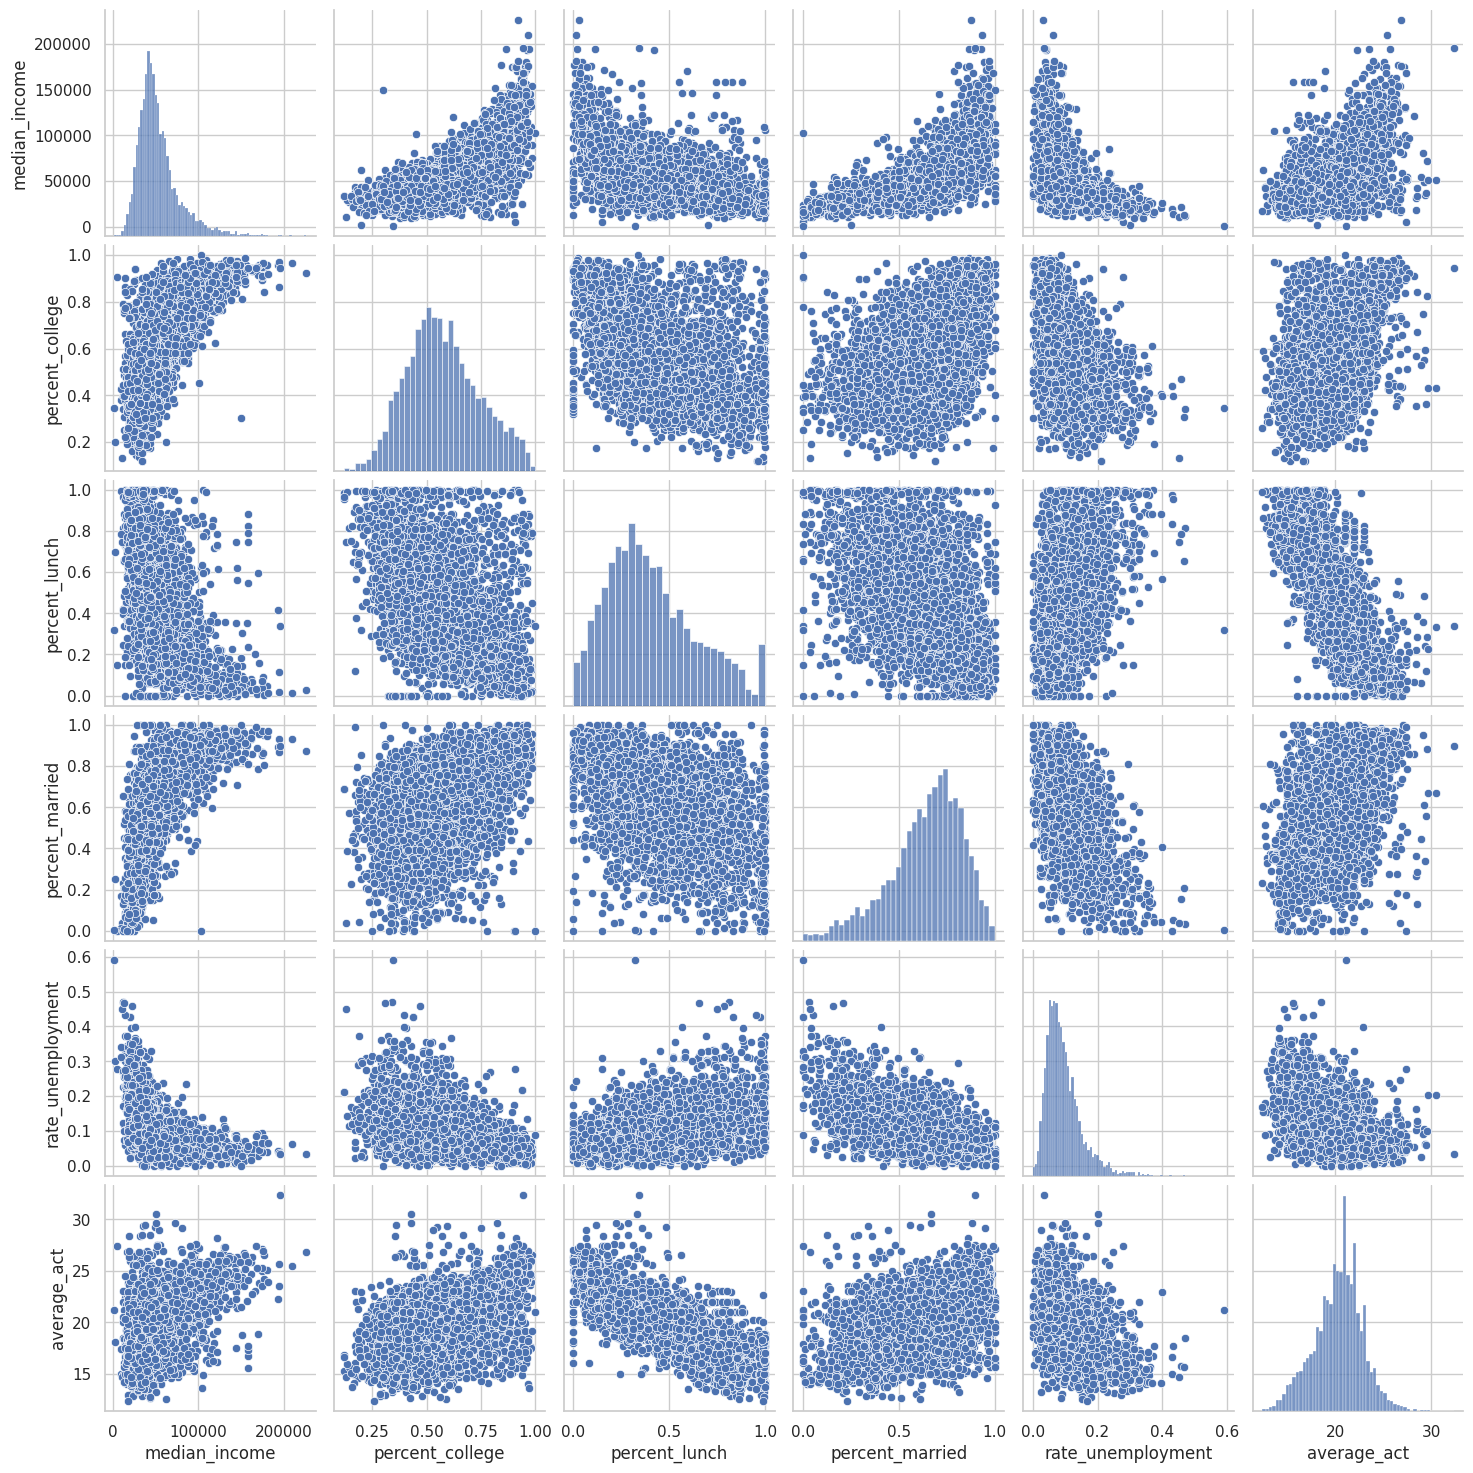

In [40]:
sns.pairplot(df_train.drop(columns = ['school_level', 'school_type', 'year', 'zip_code']))

It looks like median_income and rate_unemployment do correlate with some of the other predictors. We can definitely see some clear trends in their plots.

We can also use a heatmap to analyze the positive and negative relationships between varying predictors. 

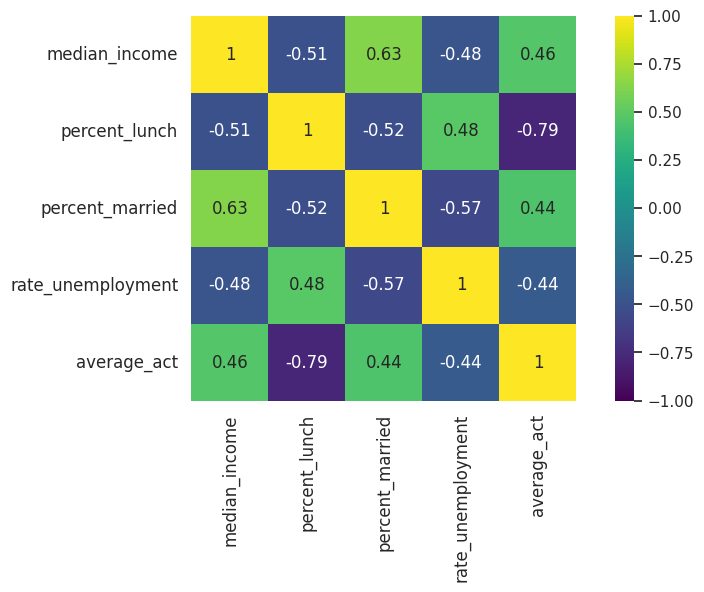

In [41]:
corr_matrix = df_train.loc[:,['median_income', 'percent_lunch', 'percent_married', 'rate_unemployment', 'average_act']].corr()

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap='viridis')

plt.tick_params(labelsize=12);

Based on our analysis above, it appears that the variable median_income is highly positively correlated with percent_married. This could suggest that individuals with higher incomes are more likely to be married. On the other hand, we observed that percent_lunch and average_act have a strong negative correlation, indicating that higher percentages of students receiving lunch assistance may be associated with lower average ACT scores.

##Comparing `average_act` With All Predictors

Here, we are creating a multiple linear regression model that includes all the important predictors that we can work with. Let's see how this model fits.

In [42]:
import statsmodels.formula.api as smf

model_all = smf.ols(formula = 'average_act ~ median_income + percent_college + percent_lunch + percent_married + rate_unemployment', data = df_train).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1985.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        07:28:58   Log-Likelihood:                -10654.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5775   BIC:                         2.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7774      0.15

Upon observation, it appears that none of the parameters possess a significant R-squared value except for percent_lunch with the lowest standard error of 0.108. This observation implies that percent_lunch may hold the most weight in the overall model and may be the most crucial parameter to consider.

# Comparing `average_act` With Individual Predictors 

To determine the ideal combination of variables, we will examine each socioeconomic variable separately as the only predictor in a model to assess their individual effects.

## Median Income

Let's regress `median_income` on `average_act`.

In [64]:
model_income = smf.ols(formula = 'average_act~median_income', data = df_train).fit()
print(model_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     1581.
Date:                Mon, 08 May 2023   Prob (F-statistic):          6.93e-306
Time:                        07:46:24   Log-Likelihood:                -12846.
No. Observations:                5781   AIC:                         2.570e+04
Df Residuals:                    5779   BIC:                         2.571e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8147      0.069    256.723

The p-value is 0.000 which is less than the significance level of 0.05. This indicates that `median_income` is statistically significant. Although, it does have a low r-squared value of 0.215. So we are not too confident yet if this is the best fit model. 

Let's visualize this with a plot. 

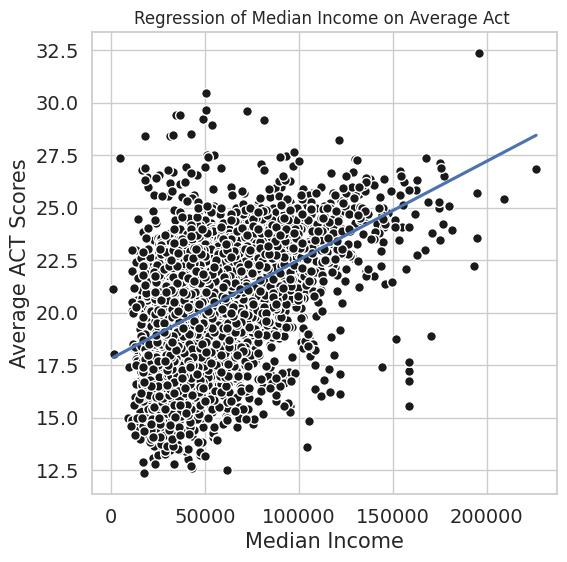

In [65]:
plt.figure(figsize=(6,6))

# Scatter plot 
plt.plot(df_train['median_income'], df_train['average_act'], 'ko', mec ='w', ms=7)

# Add the regression line
sns.regplot(data=df_train, x = 'median_income', y = 'average_act', order=1, scatter=False, ci=None)

# Add titles and labels 
plt.title('Regression of Median Income on Average Act ')
plt.xlabel('Median Income', fontsize=15)
plt.ylabel('Average ACT Scores', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

There seems to be a strong positive linear relationship between median income and average ACT. 

## Percent College 

In [108]:
model_college = smf.ols(formula = 'average_act ~ percent_college', data = df_train).fit()
print(model_college.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     1520.
Date:                Mon, 08 May 2023   Prob (F-statistic):          1.99e-295
Time:                        09:27:58   Log-Likelihood:                -12870.
No. Observations:                5781   AIC:                         2.574e+04
Df Residuals:                    5779   BIC:                         2.576e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.3351      0.106    1

`percent_college` has an r-squared value similar to `median_income`. It is too small to be determined a good fit. 

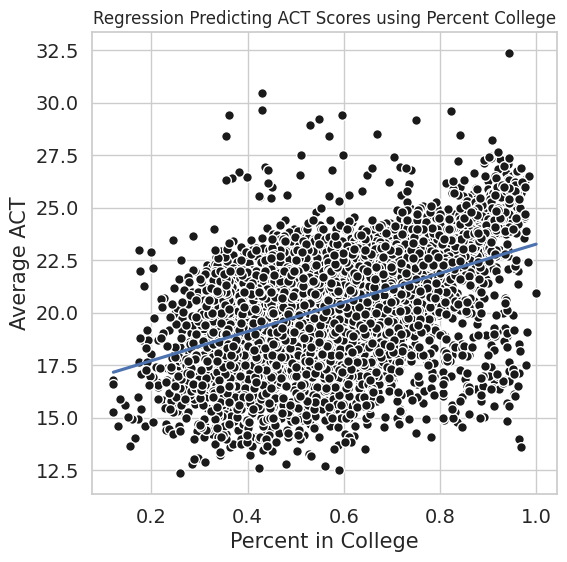

In [114]:
plt.figure(figsize=(6,6))


plt.plot(df_train['percent_college'], df_train['average_act'], 'ko', mec ='w', ms=7)


sns.regplot(data=df_train, x = 'percent_college', y = 'average_act', order=1, scatter=False, ci=None)


plt.title('Regression Predicting ACT Scores using Percent College')
plt.xlabel('Percent in College', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

plt.tick_params(labelsize=14);

There seems to be a positive relationship between the two predictors. 

## Percent Lunch

In [94]:
model_lunch = smf.ols(formula = 'average_act ~ percent_lunch', data = df_train).fit()
print(model_lunch.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     9407.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        08:39:17   Log-Likelihood:                -10753.
No. Observations:                5781   AIC:                         2.151e+04
Df Residuals:                    5779   BIC:                         2.152e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7861      0.041    577.051

The r-squared value is similar to the model that included all predictors. This indicates that `percent_lunch` has the strongest relationship to `average_act`. 

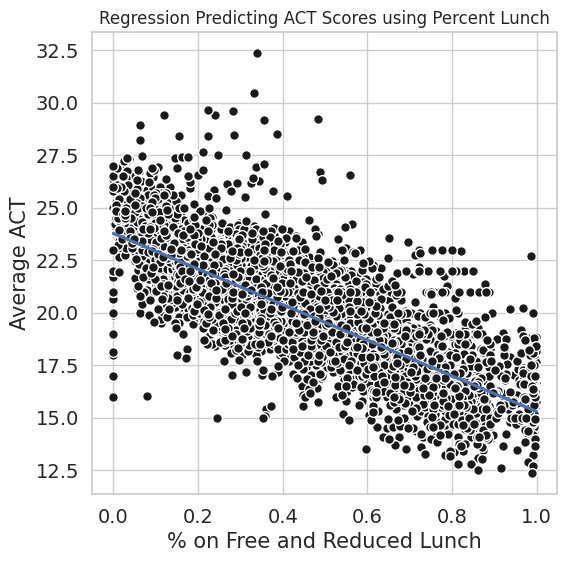

In [112]:
plt.figure(figsize=(6,6))


plt.plot(df_train['percent_lunch'], df_train['average_act'], 'ko', mec ='w', ms=7)


sns.regplot(data=df_train, x = 'percent_lunch', y = 'average_act', order=1, scatter=False, ci=None)


plt.title('Regression Predicting ACT Scores using Percent Lunch')
plt.xlabel('% on Free and Reduced Lunch', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

plt.tick_params(labelsize=14);

From the plot, there seems to be a strong negative relationship between the two predictors. 

##Rate of Unemployment

In [110]:
model_unemployed = smf.ols(formula = 'average_act ~ rate_unemployment', data = df_train).fit()
print(model_unemployed.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     1363.
Date:                Mon, 08 May 2023   Prob (F-statistic):          4.30e-268
Time:                        09:28:42   Log-Likelihood:                -12933.
No. Observations:                5781   AIC:                         2.587e+04
Df Residuals:                    5779   BIC:                         2.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.1765      0.05

`rate_unemployment` cannot be a good fit. The r-squared value is significantly smaller than the rest. 

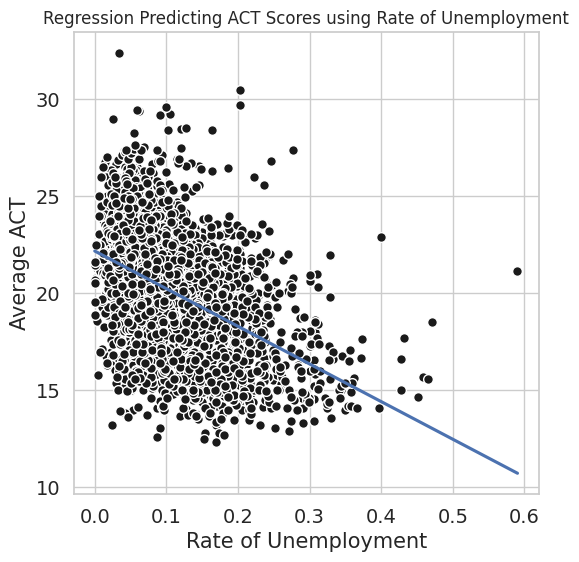

In [113]:
plt.figure(figsize=(6,6))


plt.plot(df_train['rate_unemployment'], df_train['average_act'], 'ko', mec ='w', ms=7)


sns.regplot(data=df_train, x = 'rate_unemployment', y = 'average_act', order=1, scatter=False, ci=None)


plt.title('Regression Predicting ACT Scores using Rate of Unemployment')
plt.xlabel('Rate of Unemployment', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

plt.tick_params(labelsize=14);

There seems to be a negative relationship with a trend of the plot skewing to the left. 

##Percent Married 

In [111]:
model_married = smf.ols(formula = 'average_act ~ percent_married', data = df_train).fit()
print(model_married.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     1402.
Date:                Mon, 08 May 2023   Prob (F-statistic):          7.60e-275
Time:                        09:29:16   Log-Likelihood:                -12918.
No. Observations:                5781   AIC:                         2.584e+04
Df Residuals:                    5779   BIC:                         2.585e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.5734      0.104    1

Just like `rate of unemployment` we can't say this model is a good fit either. The r-squared value is small as well. 

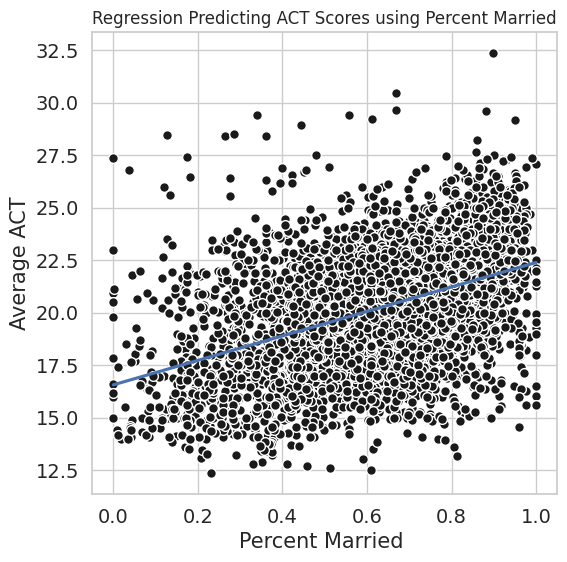

In [115]:
plt.figure(figsize=(6,6))


plt.plot(df_train['percent_married'], df_train['average_act'], 'ko', mec ='w', ms=7)


sns.regplot(data=df_train, x = 'percent_married', y = 'average_act', order=1, scatter=False, ci=None)


plt.title('Regression Predicting ACT Scores using Percent Married')
plt.xlabel('Percent Married ', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

plt.tick_params(labelsize=14);

Between these two predictors, there is a positive relationship. 

After comparing all relevant predictors with `average_act`, it is evident that the strongest correlation with this predictor is `percent_lunch`. 

## Best Subset Selection 

Our goal here is to pick the best subset selection that will help us make the most accurate predictions. We need to make sure we don't use too many factors to avoid overcomplicating the model. That's why we use measures like adjusted R-squared and AIC/BIC to help us find the right number of factors to use.

After finding the best number of factors using R-squared value, we can compare them using these measures to see which one is the best. This way, we can find the most effective subset that will give us accurate predictions while keeping the model simple. But, it's essential to remember that these measures should be used along with other methods to ensure that our model is suitable for our specific situation.

In [43]:
#Eliminating variables we don't need for subset 
X = df_train[df_train.columns.difference(['school_level', 'school_type','state', 'zip_code','average_act','year'])] 
y = df_train['average_act'] 

In [44]:
from os import name 
from itertools import combinations
import statsmodels.api as sm

# This function returns AIC, BIC, and adjusted R-squared values for use in best subset selection.
def best_subset_selection(X, y):
    variable_names = X.columns.values
    number_variables = len(variable_names)
    
    # Create empty arrays to hold the AIC, BIC, and adjusted r-squared for the best model 
    best_aic = np.zeros(number_variables)
    best_bic = np.zeros(number_variables)
    best_adjusted_rsquared = np.zeros(number_variables)
    
    # Create an empty list to store the names of the best predictors 
    best_predictors = list()
    
    # Iterate over possible numbers of predictors
    for k in range(number_variables):

        # Get the names of all combinations of k+1 predictors
        subset_names = list(combinations(variable_names, k+1))

        # Loop over all models with k+1 predictors
        for n, predictor_names in enumerate(subset_names):

            # Fit the model
            predictors_subset = X.loc[:, predictor_names]

            model = sm.OLS(y, sm.add_constant(predictors_subset)).fit() 

            # Initialize the best values with the first model
            if n == 0:

                best_rsquared_k = model.rsquared
                best_aic_k = model.aic
                best_bic_k = model.bic
                best_adjusted_rsquared_k = model.rsquared_adj
                best_predictors_k = predictor_names

            # If a model has a better r-squared, update the best values
            elif model.rsquared > best_rsquared_k:

                best_rsquared_k = model.rsquared
                best_aic_k = model.aic
                best_bic_k = model.bic
                best_adjusted_rsquared_k = model.rsquared_adj
                best_predictors_k = predictor_names

        # Record the values for the best model at this number of predictors
        best_bic[k] = best_bic_k
        best_aic[k] = best_aic_k
        best_adjusted_rsquared[k] = best_adjusted_rsquared_k
        best_predictors.append(best_predictors_k)

    return best_aic, best_bic, best_adjusted_rsquared, best_predictors

Now, let's create a function to plot the best AIC, BIC, and adjusted R-squared values at each number of possible predictors. 

In [45]:
def plot_best_subset_results(best_aic, best_bic, best_adjusted_rsquared, best_predictors):
    """ Plot the best AIC, BIC, and adjusted R-squared values at each number of possible predictors

    Input
    -----
    best_aic : AIC for the best model at each number of possible predictors

    best_bic : BIC for the best model at each number of possible predictors

    best_adjusted_rsquared : adjusted R-squared for the best model at each number of possible predictors

    best_predictors : predictor names for the best model at each number of possible predictors

    """

    number_predictors = np.arange(len(best_aic))+1

    plt.subplots(1,3, figsize=(15,4))
    plt.subplot(1,3,1)
    plt.plot(number_predictors, best_aic, 'b-o')
    plt.plot(number_predictors[np.argmin(best_aic)], np.min(best_aic), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('AIC', fontsize=18)
    plt.title(best_predictors[np.argmin(best_aic)])

    plt.subplot(1,3,2)
    plt.plot(number_predictors, best_bic, 'b-o')
    plt.plot(number_predictors[np.argmin(best_bic)], np.min(best_bic), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('BIC', fontsize=18)
    plt.title(best_predictors[np.argmin(best_bic)])

    plt.subplot(1,3,3)
    plt.plot(number_predictors, best_adjusted_rsquared, 'b-o');
    plt.plot(number_predictors[np.argmax(best_adjusted_rsquared)], np.max(best_adjusted_rsquared), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('Adjusted R-squared', fontsize=18)
    plt.title(best_predictors[np.argmax(best_adjusted_rsquared)])

    plt.subplots_adjust(wspace = 0.3)

We can run our test data through the function in order to determine the optimal subset of predictor variables for each number of predictors.

In [46]:
best_aic, best_bic, best_adjusted_rsquared, best_predictors = best_subset_selection(X, y)

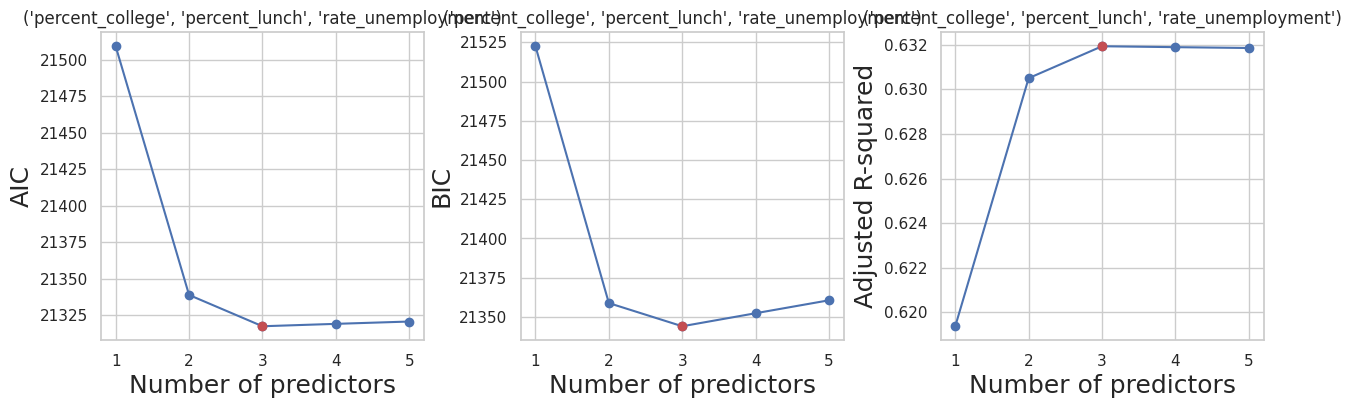

In [47]:
plot_best_subset_results(best_aic, best_bic, best_adjusted_rsquared, best_predictors)
     

In each graph, we have identified the best predictors highlighted in red. It is important to note that lower values of AIC and BIC indicate a better fit, whereas a higher value of r-squared indicates a stronger predictive performance.

Let's summon the best predictors: 

In [48]:
best_predictors

[('percent_lunch',),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch', 'rate_unemployment'),
 ('median_income', 'percent_college', 'percent_lunch', 'rate_unemployment'),
 ('median_income',
  'percent_college',
  'percent_lunch',
  'percent_married',
  'rate_unemployment')]

The analysis reveals that percent_lunch is the most effective predictor. However, the combination of percent_college, percent_lunch, and rate_unemployment appears to be the most optimal set of predictors.

Now let's create a model with the best predictors. 

In [49]:
model = smf.ols(formula='average_act ~ percent_college + percent_lunch + rate_unemployment', data=df_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     3309.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        07:28:59   Log-Likelihood:                -10655.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5777   BIC:                         2.134e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7261      0.11

The R-squared value of the model is 0.632, indicating that approximately 63.2% of the variability in the dependent variable is explained by the predictor variables. This is considered to be a moderate to a strong fit.

The model is statistically significant, as indicated by the F-statistic (F = 3309, p < 0.05), which suggests that the model is a good fit for the data. Additionally, all three predictor variables are statistically significant (p < 0.05), indicating that they have a significant relationship with the dependent variable.

We also know it is also a good fit as shown by the low AIC and BIC values.



## Additional Step 

###What is the relationship between the requirement for students to take the ACT/SAT and the average scores on these tests across different states?

Let's first merge the dummy variables that represent the ACT requirement with our training data.

In [50]:
df_merged = pd.merge(df_act, df_train, on = 'state')

Now we are going to create a model with the dummy variables. 

In [51]:
model_dummy = smf.ols('average_act ~ percent_lunch + required_yes + percent_lunch*required_yes', data=df_merged).fit()

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     3143.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        09:15:15   Log-Likelihood:                -10748.
No. Observations:                5781   AIC:                         2.150e+04
Df Residuals:                    5777   BIC:                         2.153e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

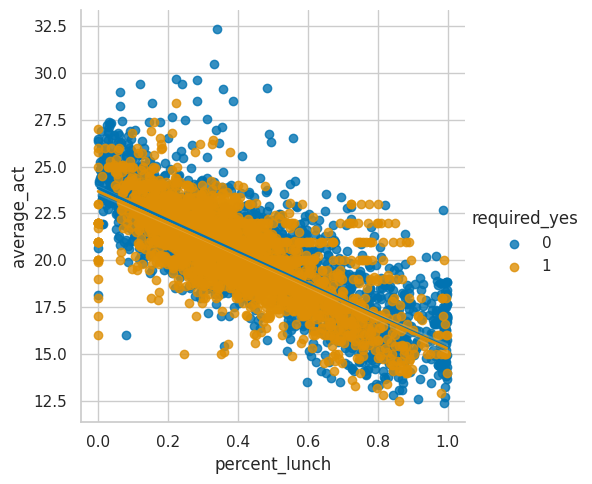

In [105]:
sns.lmplot(x="percent_lunch", y="average_act", hue = "required_yes", data=df_merged, palette='colorblind', line_kws={'lw':2})
print(model_dummy.summary())

In [60]:
#ACT scores average varying by State 
import plotly.graph_objs as go
import plotly.offline as pyo

layout = dict(
    geo={'scope': 'usa'},
    title='ACT Scores by State'
)

# Define data
data = dict(
    type='choropleth',
    locations=df_train['state'],
    locationmode='USA-states',
    z=df_train['average_act'],
    text=df_train['state'],
    colorscale='Viridis',
    colorbar={'title': 'Average ACT Scores'}
)

# Create figure object
fig = go.Figure(data=[data], layout=layout)

# Show the figure
pyo.iplot(fig)

It seems like New York has the highest average with the value 29.2, with the lowest being 16.8 in Alabama. 

###Since some states have requirements and some don't, does this affect the relationship between ACT performance and socioeconomic factors? 


Let's try setting the ACT requirement to 0; to represent states that do not require students to take it. 1 indicates that states do require it. Take a look at these regression models. 

In [101]:
#Regression with average_act, percent_lunch, and states that don't require ACT scores
model_lunch = smf.ols('average_act ~ percent_lunch + required_yes == 0', data=df_merged).fit()
print(model_lunch.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     4714.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        08:53:19   Log-Likelihood:                -10748.
No. Observations:                5781   AIC:                         2.150e+04
Df Residuals:                    5778   BIC:                         2.152e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [90]:
#Regression with average_act, percent_lunch, and states that do require ACT scores
model_lunch = smf.ols('average_act ~ percent_lunch + required_yes == 1', data=df_merged).fit()
print(model_lunch.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     4714.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        08:27:29   Log-Likelihood:                -10748.
No. Observations:                5781   AIC:                         2.150e+04
Df Residuals:                    5778   BIC:                         2.152e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [102]:
#Regression with and without ACT requirement
model_lunch = smf.ols('average_act ~ percent_lunch', data=df_train).fit()
print(model_lunch.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     9407.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        09:10:01   Log-Likelihood:                -10753.
No. Observations:                5781   AIC:                         2.151e+04
Df Residuals:                    5779   BIC:                         2.152e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7861      0.041    577.051

The difference in r-squared value isn't much. The p-value is below the level of significance 0.05, which does indicate statistical significance. However, we can conclude that ACT requirements do not impact the relationship between ACT performance and socioeconomic factors by much. 

In [96]:
#Where our data is collected from
layout = dict(geo = {'scope':'usa'})
data = dict(type = 'choropleth',
            locations = df_act['state'].unique(),
            locationmode = 'USA-states',
            z = np.ones(len(df_train['state'].unique())),
            text = df_act['state'].unique())
x = pg.Figure(data = [data], 
              layout = layout)
po.iplot(x) 

---------------------

## Conclusion

After analyzing both states that require and do not require ACT scores, we found that there is a negative relationship between average_act and percent_lunch. The regression results did not show any significant difference in r-squared values between the two groups, and the difference was only 0.001.

Out of all the states in the dataset, New York had the highest average ACT score of 29.2, while Alabama had the lowest score of 16.8. Despite missing some states in the dataset, we found that there is a strong relationship between percent_lunch and average_act with a high r-squared value. A higher r-squared value suggests a better prediction of correlation.

However, there are some limitations to our analysis. We may be missing some important predictors, and there is limited data in some states. Additionally, the SAT exam changed in 2016, which could have affected the results. Furthermore, our measurements of conditions for students are indirect, and there may be issues with quality control. These limitations should be considered when interpreting the results of our analysis in this project .